# Curso Estatística 2

## Importando bibliotecas

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson
from scipy.special import comb

dados = pd.read_csv('dados/dados.csv')

In [2]:
# Carregando dicionário de dados

sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## Distribuições de Probabilidade

### Distribuição Binominal

In [4]:
# Mega Sena
combinacoes = comb(60,6)
combinacoes

probabilidade = 1 / combinacoes

print('%0.20f' % probabilidade)

0.00000001997448858318


In [5]:
alura = comb(25,20)

In [6]:
print(alura)
print('%0.20f' % (1/alura))

53130.0
0.00001882175795219273


## Exercício

In [7]:
n = 10 # Numero de Ensaios
numero_de_alternativas_por_questao = 3
p = 1 /numero_de_alternativas_por_questao # Sucesso
q = 1 - p # Fracasso
k = 5 # Sucesso

probabilidade = (comb(n,k) * (p ** k) * (q ** (n-k)))
probabilidade2 = binom.pmf(k, n, p)

In [8]:
# Análise de passar as fases do concurso
probabilidade = binom.pmf([5,6,7,8,9,10], n, p).sum()
probabilidade

0.21312808006909525

In [9]:
# Probabilidade acumulada de acertar 1 + 2...4
binom.cdf(4, n, p) 

0.7868719199309049

In [10]:
binom.sf(4, n, p)

0.21312808006909517

In [11]:
# Lançamento de moeda
n = 4 # Numero de Ensaios
numero_de_alternativas_por_questao = 2
p = 1 /numero_de_alternativas_por_questao # Sucesso
q = 1 - p # Fracasso
k = 2 # Sucesso

probabilidade = (comb(n,k) * (p ** k) * (q ** (n-k)))
probabilidade2 = binom.pmf(k, n, p)

In [12]:
probabilidade2

0.3750000000000001

In [13]:
# Lançamento de Dado
n = 10
numero_de_alternativas = 6
p = 1 / numero_de_alternativas
q = 1 - q
k = 3

binom.sf(2, n, p)

0.22477320212874052

In [14]:
## Gincana
p = 0.6
q = 1-p
n = 12
k = 8

probabilidade = binom.pmf(k, n, p)
probabilidade

0.2128409395199996

In [15]:
equipes = 30 * probabilidade
equipes

6.385228185599988

In [16]:
# Olhos Azuis
p = 0.22
n = 3
k = 2
N = 50

probabilidade = binom.pmf(k , n, p)
media = probabilidade * N

In [17]:
media

5.662799999999999

## Distribuição Poisson

In [18]:
media = 20 # pedidos por hora
k = 15 # Numero de Sucessos
probabilidade= ((np.e ** (-media)) * (media ** k)) / (np.math.factorial(k))
print(f'A Probabilidade é {probabilidade}') # Solução 1

A Probabilidade é 0.0516488535317584


In [19]:
probabilidade = poisson.pmf(k, media)
print(f'A Probabilidade é {probabilidade}') # Solução 2

A Probabilidade é 0.05164885353175814


In [20]:
# Problema Padaria
media = 20
k = 25
(poisson.pmf(k, media)*100)

4.458764910826764

## Distribuição Normal

In [21]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


## Tabelas Padronizadas

In [22]:
tabela_normal_padronizada = pd.DataFrame(
    [], 
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


In [23]:
media = 1.7 # dados.Altura.mean()
desvio_padrao = 0.1
Z = (1.80 - media) / desvio_padrao

probabilidade = 0.8413

# A chance de encontrar uma pessoa com menos de 1.80

In [24]:
norm.cdf(Z)

0.8413447460685431

In [25]:
media = 70
desvio_padrao = 5
Z = (70 - media) / desvio_padrao
norm.cdf(Z)*100

50.0

In [26]:
# Ter entre 1,60 e 1,80
media = 1.7 # dados.Altura.mean()
desvio_padrao = 0.1
Z = (1.80 - media) / desvio_padrao
# probabilidade = 0.8413
probabilidade = norm.cdf(Z) - 0.5

print(f'A probabilidade de uma pessoa estar entre 1,6 e 1,8 é : {probabilidade*2}')


A probabilidade de uma pessoa estar entre 1,6 e 1,8 é : 0.6826894921370863


In [27]:
# Ter entre 1,60 e 1,80 pelo SciPy
media = 1.7 
desvio_padrao = 0.1

Z_inferior = (1.6 - media) / desvio_padrao
Z_inferior = round(Z_inferior, 2)

Z_superior = (1.8 - media) / desvio_padrao
Z_superior = round(Z_superior, 2)

probabilidade = norm.cdf(Z_superior) - (1 - norm.cdf(Z_superior))
probabilidade

0.6826894921370859

In [28]:
probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
probabilidade

0.6826894921370859

In [29]:
# Faturamento diario de um motorista
media = 300
desvio_padrao = 50
Z_inferior = (250 - media) / desvio_padrao
Z_superior = (350 - media) / desvio_padrao

probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
print(f'A probabilidade de ganhar entre R$250,00 e R$350,00 é {(probabilidade*100).round(2)}%')

Z_inferior = (400-media) / desvio_padrao
Z_superior = (500-media) / desvio_padrao
probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
print(f'A probabilidade de ganhar entre 400 e 500,00 é de {(probabilidade*100).round(2)}%.')

A probabilidade de ganhar entre R$250,00 e R$350,00 é 68.27%
A probabilidade de ganhar entre 400 e 500,00 é de 2.27%.


In [30]:
# Altura maior que 1,90
media = 1.70
desvio_padrao = 0.1
Z = (1.90 - media) / desvio_padrao
(1-norm.cdf(Z)).round(5)

0.02275

In [31]:
# Lampada Durabilidade
media = 720
desvio_padrao = 30
Z_inferior = (650-media)/desvio_padrao
Z_superior = (750-media)/desvio_padrao
probabilidade = ((norm.cdf(Z_superior) - norm.cdf(Z_inferior))*100).round(2)
print(f'A probabilidade de durar entre 650 e 750 dias é de {probabilidade}%')

Z = (800-media) / desvio_padrao
probabilidade= round((1-norm.cdf(Z))*100,2)
print(f'A probabilidade de durar mais do que 800 dias é de {probabilidade}%')

Z = (700-media) / desvio_padrao
probabilidade = norm.cdf(Z)*100
print('Menos de 700 dias é de ',probabilidade)

A probabilidade de durar entre 650 e 750 dias é de 83.15%
A probabilidade de durar mais do que 800 dias é de 0.38%
Menos de 700 dias é de  25.24925375469229


In [32]:
norm.cdf(1.96)


0.9750021048517795

In [33]:
1-norm.cdf(2.15)

0.015777607391090465

In [34]:
norm.cdf(-0.78)

0.21769543758573312

In [35]:
1-norm.cdf(0.59)

0.27759532475346493

In [36]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


## Amostra Aleatória Simples

In [37]:
amostra = dados.sample(n=1000, random_state = 101)

In [38]:
amostra.Renda.mean()


1998.783

In [39]:
dados.Sexo.value_counts(normalize=True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [40]:
amostra.Sexo.value_counts(normalize=True)

0    0.706
1    0.294
Name: Sexo, dtype: float64

In [41]:
# Amostragem Estratificada
# Amostragem por Conglomerados

## Estimação

### Teorema do limite central

In [42]:
n = 2000
total_de_amostras = 1500

amostras = pd.DataFrame()

for i in range(total_de_amostras):
    _ = dados.Idade.sample(n)
    _.index = range(0, len(_))
    amostras['Amostra_'+str(i)] = _


amostras

In [43]:
amostras

,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,...,Amostra_1490,Amostra_1491,Amostra_1492,Amostra_1493,Amostra_1494,Amostra_1495,Amostra_1496,Amostra_1497,Amostra_1498,Amostra_1499
0,34,59,35,41,35,34,61,56,60,44,...,31,17,47,63,36,28,47,67,63,44
1,62,33,37,36,34,35,34,41,55,39,...,23,59,33,56,36,28,59,52,55,64
2,46,68,50,51,45,60,38,34,45,25,...,52,67,35,49,22,24,51,52,41,19
3,50,56,55,35,49,51,36,33,40,47,...,31,28,43,42,52,39,68,53,45,50
4,38,50,42,46,57,34,35,31,33,67,...,35,42,25,62,26,26,46,53,53,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,30,60,50,37,61,38,46,68,18,50,...,24,39,56,57,52,40,53,47,40,34
1996,59,54,52,68,17,54,18,59,50,46,...,47,48,58,33,37,55,33,39,37,43
1997,28,29,47,31,74,29,38,24,63,28,...,40,45,76,39,60,55,30,34,46,28
1998,43,29,33,33,45,28,46,33,40,58,...,76,50,73,45,53,50,61,34,35,32


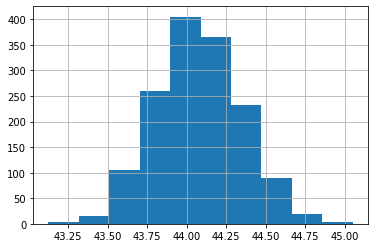

In [44]:
amostras.mean().hist()


In [45]:
dados.Idade.mean()

44.07142113482561

In [46]:
amostras.mean().mean()

44.077629666666624

In [47]:
amostras.mean().std()

0.2718858528216057

In [48]:
dados.Idade.std() / np.sqrt(n)

0.2790743302740527

## Nivel de Confiança e Significância

In [49]:
amostra.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
29042,29,0,39,8,5,480,1.719128
62672,43,0,55,2,6,250,1.639205
29973,29,1,36,2,12,788,1.654122
22428,26,0,46,8,8,1680,1.622450
55145,41,0,37,2,9,2500,1.625268


In [50]:
# Saco de arroz
media_amostra = 5050

significancia = 0.05
confianca = 1-significancia

desvio_padrao = 150
n = 20 # sacos
raiz_de_n = np.sqrt(n)

sigma = desvio_padrao / raiz_de_n

z = norm.ppf(0.975)

e = z * sigma # gramas - 65.73919054324361

tabela_normal_padronizada[16:26]
z

1.959963984540054

In [51]:
# Solução 1 - Calculando o intervalo de confiança para a média
intervalo = (media_amostra - e, media_amostra + e) ## (4984.260809456757, 5115.739190543243)

In [52]:
# Solução 2 - Calculando o intervalo de confiança para a média
norm.interval(alpha = 0.95, loc = media_amostra, scale = sigma) # (4984.260809456757, 5115.739190543243)

(4984.260809456757, 5115.739190543243)

In [53]:
# Clientes FastFood
z = norm.ppf(0.975)
desvio_padrao = 6
n = 50

e = z * (desvio_padrao / np.sqrt(n))
print("R$ {0:0.2f}".format(e))

R$ 1.66


In [54]:
# Exercicio 2
n = 1976
desvio_padrao = 11
media_amostral = 28
raiz_de_n = np.sqrt(n)

sigma = desvio_padrao / raiz_de_n

norm.interval(alpha = 0.9, loc = media_amostral, scale=sigma)

(27.592969951356466, 28.407030048643534)

In [55]:
0.95 /2 

0.475

In [56]:
0.5 + 0.475

0.975

In [57]:
# Reforço 
significancia = 0.05
confianca = 1 - significancia
z = norm.ppf(0.5 + confianca/2)

desvio_padrao =  150
n = 20
raiz_n = np.sqrt(n)
sigma = desvio_padrao / raiz_n

e = z * sigma

intervalo = (
media_amostra - e,
media_amostra + e)

In [58]:
norm.interval(alpha = confianca, loc = media_amostra, scale=sigma)

(4984.260809456757, 5115.739190543243)

In [59]:
intervalo

(4984.260809456757, 5115.739190543243)

In [60]:
n = 50
desvio_padrao = 6
confianca = 0.95
sigma = desvio_padrao / np.sqrt(n)
z = norm.ppf(0.5 + confianca/2)

e = z * ( sigma)


In [61]:
e

1.6630845892196133

In [62]:
n = 1976
desvio_padrao = 11
media_amostra = 28
confianca = 0.9
z = norm.ppf(0.5 + confianca/2)
sigma = desvio_padrao / np.sqrt(n)

norm.interval(alpha=confianca , loc=media_amostra, scale=sigma)

(27.592969951356466, 28.407030048643534)

In [63]:
z

1.6448536269514722

## Calculo do tamanho da amostra

In [64]:
# Variáveis quantitavias e população infinita

confianca = 0.95
sigma = 3323.39
e = 100.0
z = norm.ppf((confianca/2)+0.5)
n = (z * (sigma/e)) ** 2

print(n.round(),'pessoas')

4243.0 pessoas


In [65]:
# Problema Loja
media = 45.50
sigma = 15

significancia = 0.10
confianca = 1-significancia
z =  norm.ppf((confianca/2)+0.5)

erro_percentual = 0.10
e = media * erro_percentual

n = (z*(sigma/e)) ** 2
n.round()





29.0

## Variáveis quantitativas População finita

In [66]:
N = 10000
sigma = 12 # ml
e = 5 # ml

z = norm.ppf(0.5 + (0.95/2))

n = ((z**2) * (sigma**2) * (N)) / (((z**2) * (sigma**2)) + ((e**2) * (N-1)))

print(n.round(), 'latas')


22.0 latas


In [67]:
# Farina
N = 2000
z = norm.ppf(0.5 + (0.95 / 2))
s = 480
e = 0.3 * 1000   # Convertendo kg para g

n = ((z**2) * (s**2) * (N)) / (((z**2) * (s**2)) + ((e**2) * (N - 1)))
int(n.round()) # Sacos

10

# Rendimento Médio

In [80]:
renda_5000 = dados.query('Renda<=5000').Renda

sigma = renda_5000.std()
media = renda_5000.mean()

z = norm.ppf(0.5 + (0.95/2))
e = 10

In [83]:
# Calculando o tamanho da amostra
n = (z * (sigma/e)) ** 2
n = int(round(n))

In [84]:
# Calculando o intervalo de confiança para a média
intervalo = norm.interval(alpha=0.95, loc=media, scale=(sigma / np.sqrt(n)))

In [85]:
intervalo

(1416.5372195108241, 1436.5372094786223)